<a href="https://colab.research.google.com/github/rattanvansh/GenAI/blob/main/GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape (10000, 28, 28, 1).astype('float32') / 255


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)
X_train.shape
y_train.shape

(60000, 10)

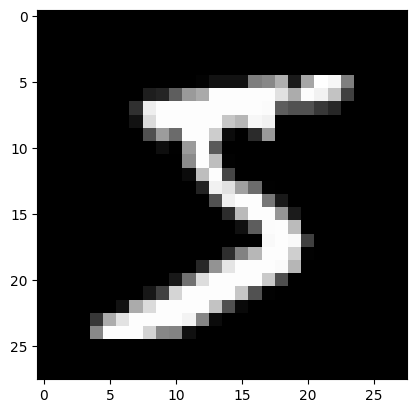

In [ ]:

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:

plt.imshow(X_train[0].reshape((1,784)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:

model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_ann = model_ann.fit(X_train, y_train, epochs=10, validation_split=0.1)

model_ann.save('model_ann.h5')

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8675 - loss: 0.4630 - val_accuracy: 0.9647 - val_loss: 0.1266
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9620 - loss: 0.1284 - val_accuracy: 0.9713 - val_loss: 0.0967
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9759 - loss: 0.0792 - val_accuracy: 0.9765 - val_loss: 0.0810
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9825 - loss: 0.0577 - val_accuracy: 0.9778 - val_loss: 0.0803
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0446 - val_accuracy: 0.9777 - val_loss: 0.0779
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9902 - loss: 0.0344 - val_accuracy: 0.9780 - val_loss: 0.0778
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9919 - loss: 0.0273 - val_accuracy: 0.9770 - val_loss: 0.0774
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9933 - loss: 0.0219

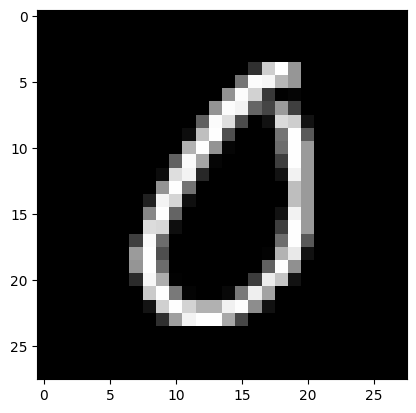

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
0


In [ ]:

img = X_train[6723]

plt.imshow(img, cmap='gray')
plt.show()

img = img.reshape(1, 28,28)

pred = np.argmax(model_ann.predict(img))
print(pred)

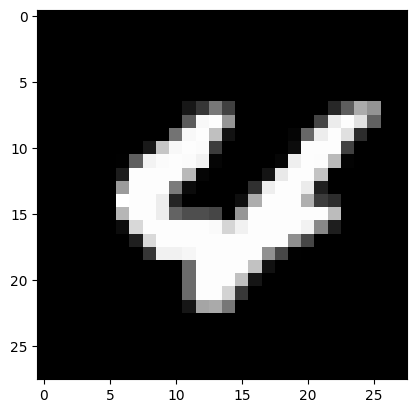

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[7.4492224e-10 9.0550240e-20 5.8108345e-08 1.1296881e-11 9.9999893e-01
  6.6496331e-13 1.0691763e-06 5.9604030e-11 4.0587693e-11 1.5931719e-09]]


In [ ]:

img = X_test[6723]

plt.imshow(img, cmap='gray')
plt.show()

img = img.reshape(1, 28,28)

pred = (model_ann.predict(img))
print(pred)

In [ ]:
import requests

image_url = "https://cdn.pixabay.com/photo/2015/04/04/19/13/two-706896_1280.jpg"
filename = "image.jpg"

response = requests.get(image_url, stream=True)

if response.status_code == 200:
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")

Image downloaded successfully as image.jpg


In [ ]:

import cv2

# Load the image
img = cv2.imread('image.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,  79, 131,
        126,  66, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 254, 149,  41, 158, 159,
        159, 158,  68, 115,  62, 220, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 254,  49, 159, 159, 159, 159,
        159, 159, 159, 158, 131, 114,  99, 253, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,  65, 159, 159, 159, 159, 159,
        159, 159, 159, 159, 159,  46, 135, 133, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 141, 159, 159, 159,  93, 151, 144,
         91, 159, 159, 159, 159, 196,  99, 108, 118, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255,  67, 159, 159, 158,  36,  28,  26,
         22,  52, 159, 159, 159,  73,  61,  65,  71, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 157, 159, 159, 158,  33,  33,  32,
         32, 181, 159, 159, 159, 159,  52,  54,  55, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 250, 103, 110, 159,  46,  45,  44,  43,
        253, 180, 159, 159, 159, 158,  48,  52,  52, 252, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 253,  75,  24,  51,  51,  51,
        255,  52, 159, 159, 159, 119,  47,  48,  48, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        208, 157, 159, 159, 159, 161,  38,  39,  39, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  62,
         31, 159, 159, 159, 157,  36,  32,  32,  33, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 201,  44,
        159, 159, 159, 159, 115,  31,  31,  31, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  56,  46, 159,
        159, 159, 158, 162,  30,  30,  30, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 105,  42, 159, 159,
        159, 159, 140,  28,  28,  28, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 188, 158, 159, 159, 159,
        154,  83,  28,  28,  27, 254, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 173, 164, 159, 159, 159, 171,
         47,  27,  27, 242, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 253, 111, 159, 159, 159, 159, 142,  25,
         45,  46,  46,  46,  47,  46,  47,  46,  47,  50, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 159, 159, 159, 157, 125,  53,  55,
         72,  94, 120, 134, 149, 157,  46,  51,  51,  50, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 159, 159, 159, 159, 159, 159, 159,
        159, 159, 159, 159, 159, 159,  40,  51,  51,  45, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 159, 159, 159, 159, 159, 159, 159,
        159, 159, 159, 159, 159, 159,  25,  51,  51, 252, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 248,  89,  56,  70, 161, 158, 159, 159,
        159, 159, 159, 159, 159, 159,  49,  51,  51, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

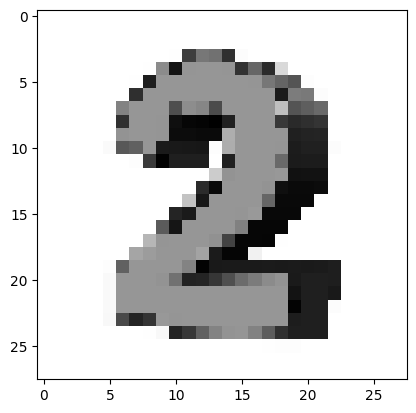

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3


In [ ]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28))))

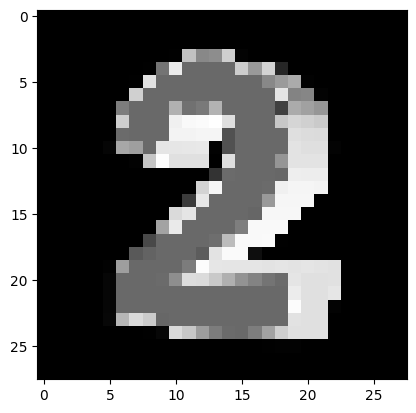

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2


In [ ]:
img = 1. - img

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(img.reshape(1, 28, 28))))


In [ ]:
image_url = 'https://i.sstatic.net/RdEpj.png'
filename = "digit.jpg"

response = requests.get(image_url, stream=True)

if response.status_code == 200:
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")

Image downloaded successfully as digit.jpg


In [ ]:
img = cv2.imread('digit.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  44, 232,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 201, 250,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 201, 249, 253,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  18, 242, 255, 243,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 140, 255, 255, 238,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         26, 197, 255, 220,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59,
        217, 254, 244,  74,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 183,
        255, 247, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 255,
        255, 139,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 255,
        239,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 175, 253, 255,
        201,   0,   0,  40, 110, 110,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 255, 255, 255,
        221,  76, 219, 232, 255, 255, 165,  52,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  19, 180, 255, 255, 255,
        255, 255, 255, 240, 239, 240, 255, 179,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 140, 254, 255, 255, 255,
        247, 139, 139,  17,   0,  43, 255,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 252, 255, 255, 161,
          0,   0,   0,   0,   0,  20, 105,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 102, 251, 255, 255,  74,
          0,   0,   0,  99, 143, 242,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  73, 223, 255, 255, 238,
        191, 191, 238, 246, 166,  75,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 139, 185, 255,
        255, 199,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

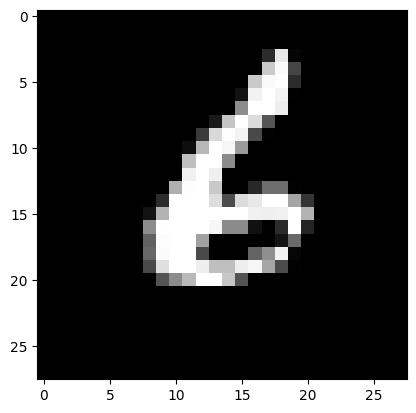

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6


In [ ]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img - 1., cmap='gray')
plt.show()

print(np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28))))



In [ ]:
model_ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0843


[0.07912711799144745, 0.9789000153541565]